# Red Wine Quality

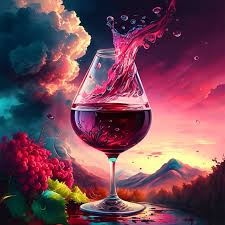

## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime 



from sklearn.linear_model import LogisticRegression

## Statsmodel
import statsmodels.api as sm

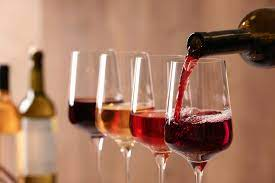

## Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\winequality-red.csv")

## Basic Checks

In [3]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,nan
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,nan
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,nan
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6.000000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5.000000


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


In [5]:
df.shape

(1599, 12)

In [6]:
df.size

19188

In [7]:
pd.DataFrame(list(df)) 

,0
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


## Domain Analysis


***1) Fixed acidity : Refers to the concentration of non-volatile acids in a wine. It contributes to the overall tartness or sourness of the wine and is an important factor in determining its taste profile.***

***2) Volatile acidity : Represents the presence of volatile acids, primarily acetic acid, in a wine. Higher levels of volatile acidity can give a vinegar-like off-flavor and are generally considered undesirable.***

***3) Citric acid : A natural acid found in citrus fruits, citric acid can be present in wines as well. It adds freshness and a citrusy flavor, often contributing to the overall balance and complexity of the wine.***

***4) Residual sugar : Refers to the amount of sugar remaining in the wine after fermentation. It contributes to the sweetness of the wine and can range from dry (very little residual sugar) to sweet (higher residual sugar levels).***

***5) Chlorides : Represents the concentration of salt in the wine. High levels of chlorides can contribute to a salty taste, which is generally undesirable in wine.***

***6) Free sulfur dioxide : Sulfur dioxide is commonly used as a preservative in winemaking. Free sulfur dioxide refers to the amount of sulfur dioxide that is not bound to other compounds. It helps prevent oxidation and microbial spoilage in wine.***

***7) Total sulfur dioxide : Represents the total amount of both free and bound sulfur dioxide in the wine. It is an important parameter for assessing the wine's stability and preservation.***

***8) Density : Refers to the mass of the wine per unit volume. It is influenced by factors such as sugar content, alcohol content, and overall composition, and can provide insights into the wine's body and richness.***

***9) pH : Represents the level of acidity or alkalinity in a wine on a logarithmic scale. Lower pH values indicate higher acidity, while higher pH values indicate lower acidity. pH plays a crucial role in determining the overall balance and stability of the wine.***

***10) Sulphates : Refers to the concentration of sulfur-containing compounds, such as sulfites, in the wine. Sulphates can act as antioxidants and preservatives, helping to maintain the wine's freshness and prevent spoilage.***

***11) Alcohol : Represents the percentage of alcohol by volume in the wine. It contributes to the wine's body, texture, and overall perception of warmth or heat.***

***12) Quality :  A score between 0 and 10 based on sensory evaluation data. It represents the overall subjective assessment of the wine's quality, taking into account various factors such as aroma, taste, balance, complexity, and overall enjoyment.***

## Check for Information & Data type 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1595 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [9]:
df.describe()  #### Statistical parameters of Numerical columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1593.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1599.000000,1599.000000,1596.000000,1599.000000,1599.000000,1595.000000
mean,8.324294,0.527821,0.270976,2.538806,0.087467,15.889167,46.467792,0.996747,3.311046,0.658149,10.422983,5.637618
std,1.742704,0.179060,0.194801,1.409928,0.047065,10.458936,32.895324,0.001887,0.154484,0.169507,1.065668,0.807953
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (236, 12)


## Missing value Treatment

In [11]:
df.isnull().sum()

fixed acidity           6
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     2
total sulfur dioxide    0
density                 0
pH                      3
sulphates               0
alcohol                 0
quality                 4
dtype: int64

<Axes: >

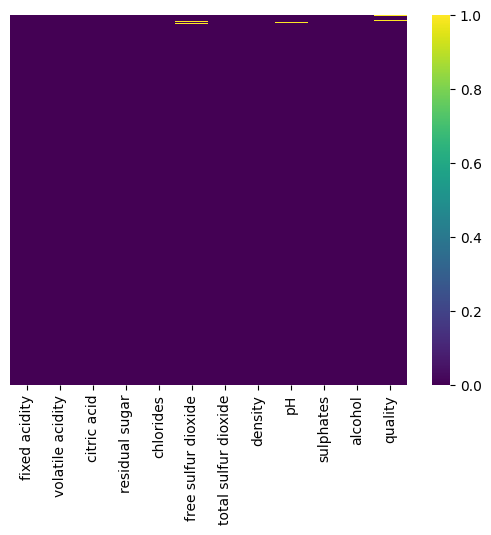

In [12]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

In [13]:
def check_missing(x):
    x= x.isnull().sum()*100/ len(x)
    x= x[x>0]
    x= x.sort_values(ascending= False)
    return x
check_missing(df)

fixed acidity          0.375235
quality                0.250156
pH                     0.187617
free sulfur dioxide    0.125078
dtype: float64

## Filling Missing Values

In [14]:
df["fixed acidity"]

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [15]:
df["fixed acidity"].describe()

count    1593.000000
mean        8.324294
std         1.742704
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [16]:
df["fixed acidity"].median()

7.9

<Axes: xlabel='fixed acidity', ylabel='Density'>

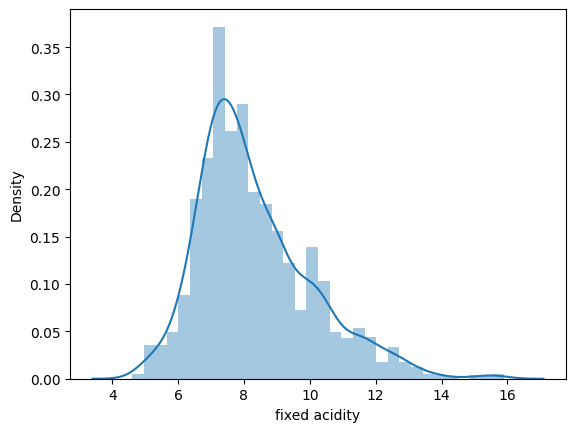

In [17]:
sns.distplot(df["fixed acidity"])    ### to see graph

In [18]:
df["fixed acidity"].quantile([.001,.999]) 

0.001     4.8184
0.999    15.6000
Name: fixed acidity, dtype: float64

In [19]:
df[(df["fixed acidity"] > 4) & (df["fixed acidity"] < 14)]["fixed acidity"].describe()   ## for Extra Acu

count    1584.000000
mean        8.285480
std         1.668944
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        13.800000
Name: fixed acidity, dtype: float64

In [20]:
df["fixed acidity"]=df["fixed acidity"].fillna(7.900000)

In [21]:
check_missing(df)

quality                0.250156
pH                     0.187617
free sulfur dioxide    0.125078
dtype: float64

In [22]:
df["quality"]

0       NaN
1       NaN
2       NaN
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64

In [23]:
df.quality.describe()

count    1595.000000
mean        5.637618
std         0.807953
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [24]:
df.quality=df.quality.fillna(6.00)

In [25]:
df.pH

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [26]:
df.pH.describe()

count    1596.000000
mean        3.311046
std         0.154484
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [27]:
df.pH=df.pH.fillna(3.310000)

In [28]:
check_missing(df)

free sulfur dioxide    0.125078
dtype: float64

In [29]:
df["free sulfur dioxide"]

0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
        ... 
1594    32.0
1595    39.0
1596    29.0
1597    32.0
1598    18.0
Name: free sulfur dioxide, Length: 1599, dtype: float64

In [30]:
df["free sulfur dioxide"].describe()

count    1597.000000
mean       15.889167
std        10.458936
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [31]:
df["free sulfur dioxide"]= df["free sulfur dioxide"].fillna(14.000000)

In [32]:
check_missing(df)

Series([], dtype: float64)

In [33]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

***Doesn't have any null values***

# Explorartory Data Analysis (EDA)

***Uniqueness***

In [34]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:   {num_distinct_values} distinct values")

fixed acidity:   96 distinct values
volatile acidity:   143 distinct values
citric acid:   80 distinct values
residual sugar:   91 distinct values
chlorides:   153 distinct values
free sulfur dioxide:   60 distinct values
total sulfur dioxide:   144 distinct values
density:   436 distinct values
pH:   89 distinct values
sulphates:   96 distinct values
alcohol:   65 distinct values
quality:   6 distinct values


# Visualization : Correlation Among the Independent Atrributes.

<Axes: >

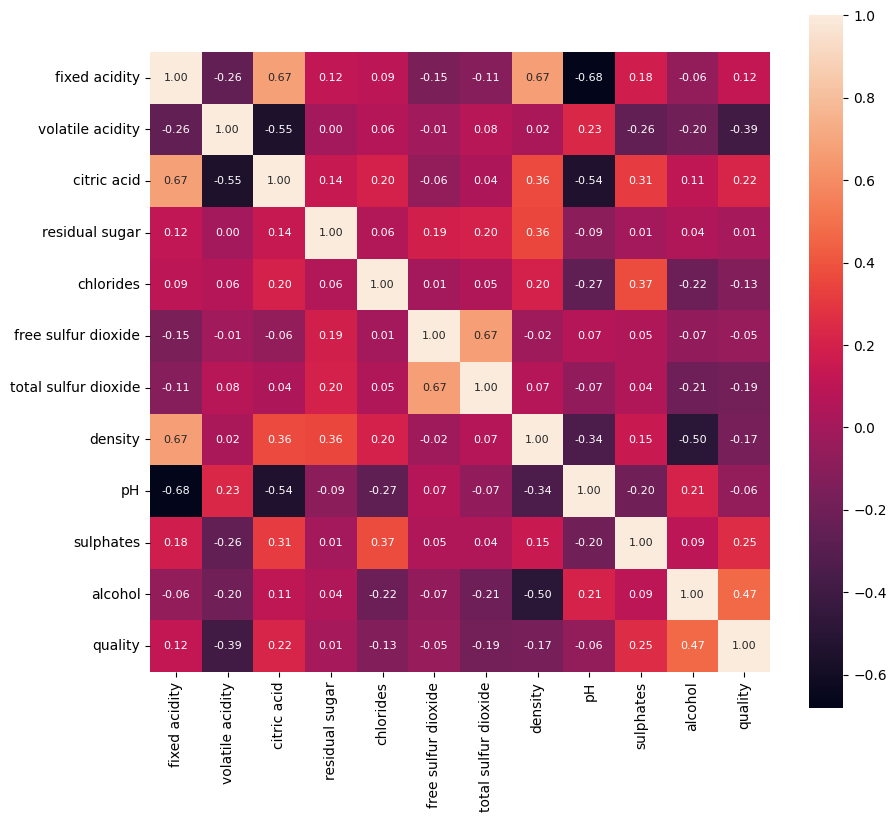

In [35]:
corr = df.corr()

plt.figure(figsize = (10,9))
sns.heatmap(corr,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

***Many features are having high correlation with the other features:-***

***Fixed Acidity is having high correlation with citic acid and pH and vice-versa.***

***Volatile Acidity is having high correlation with citic acid adn vice-versa.***

***Free Sulfur Dioxide is having high correlation with total sulfur dioxide, pH, Sulphates and vice-versa.***

***Density is having high correaltion with fixed acidity, alcohol and vice-versa.***

# Visualizing the Target Variable

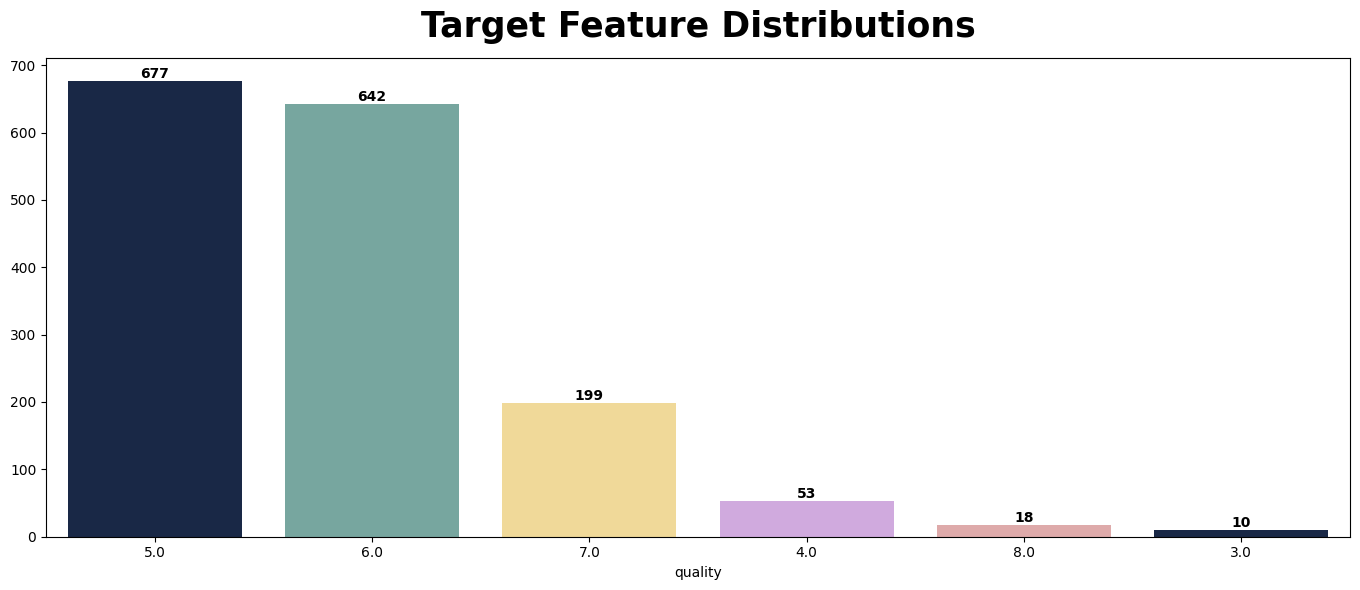

In [36]:
plt.figure(figsize=(13.7,6))
z = df["quality"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

***Most of the wines are having quality of 5 or 6.
We can clearly observe a class-imbalance in the target feature.***

# Visualizing "Fixed Acidity" Attribute.

In [37]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="quality",y=column, data=df, palette=["#FFA07A","#D4A1E7","#FFC0CB","#87CEFA","#F08080","#D8BFD8"])
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)
    
    plt.subplot(2,1,2)
    sns.histplot(x=column,kde=True,hue="quality",data=df, palette="Set2")
    skew = df[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()

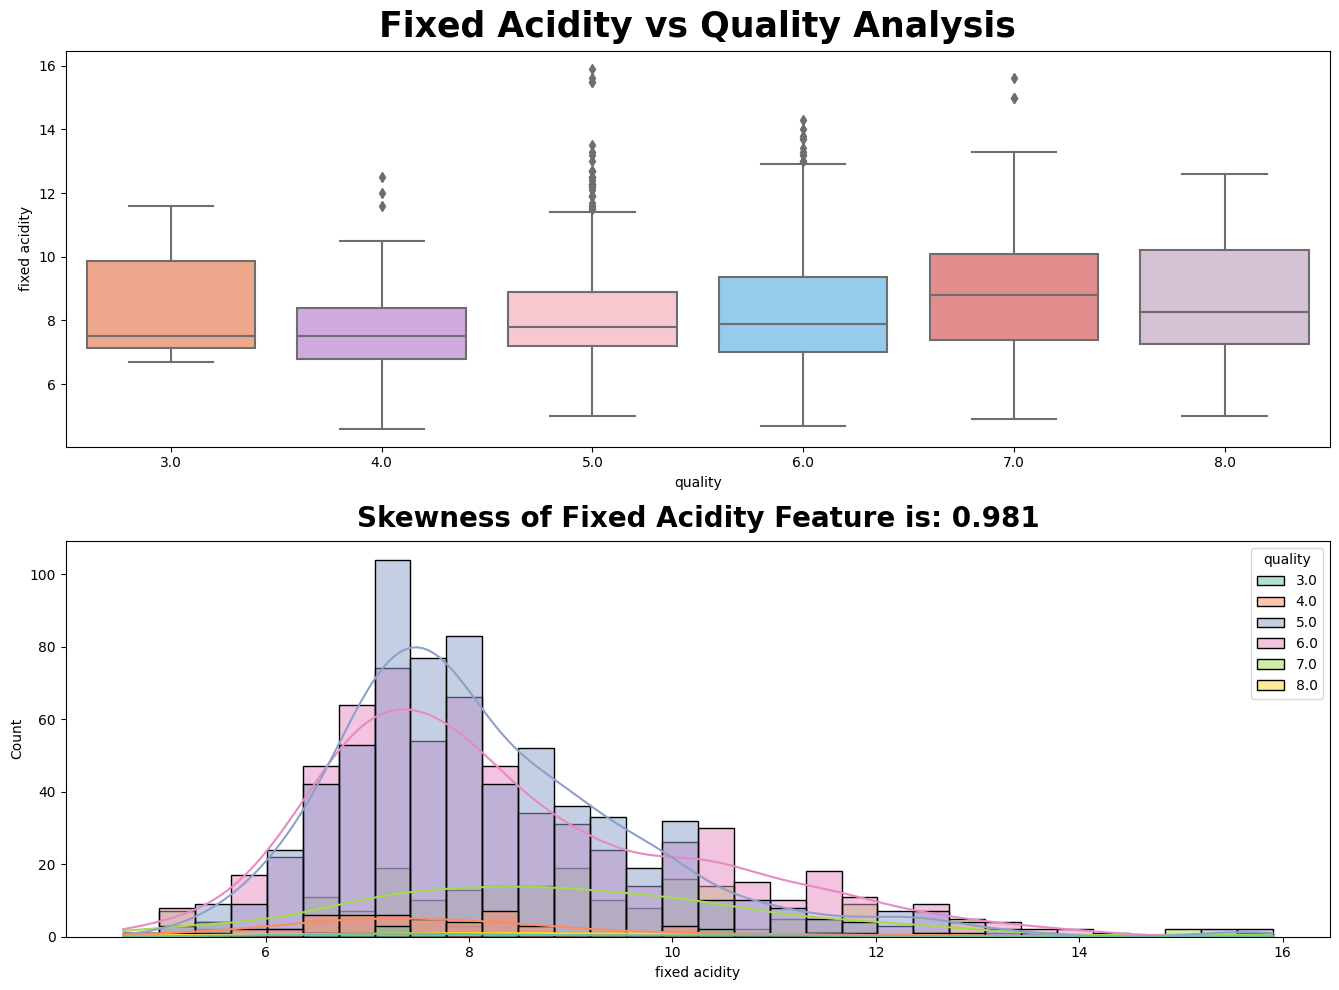

In [38]:
numerical_plot("fixed acidity")

***The feature fixed acidity is having almost a symmetric distribution but the distribution is little right skewed with a skewness value of 0.941.***

***Skewness can lead to several implications like model performance, hypothesis testing and it returns biased estimation.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.***

# Visualizing "Volatile Acidity" Attribute.

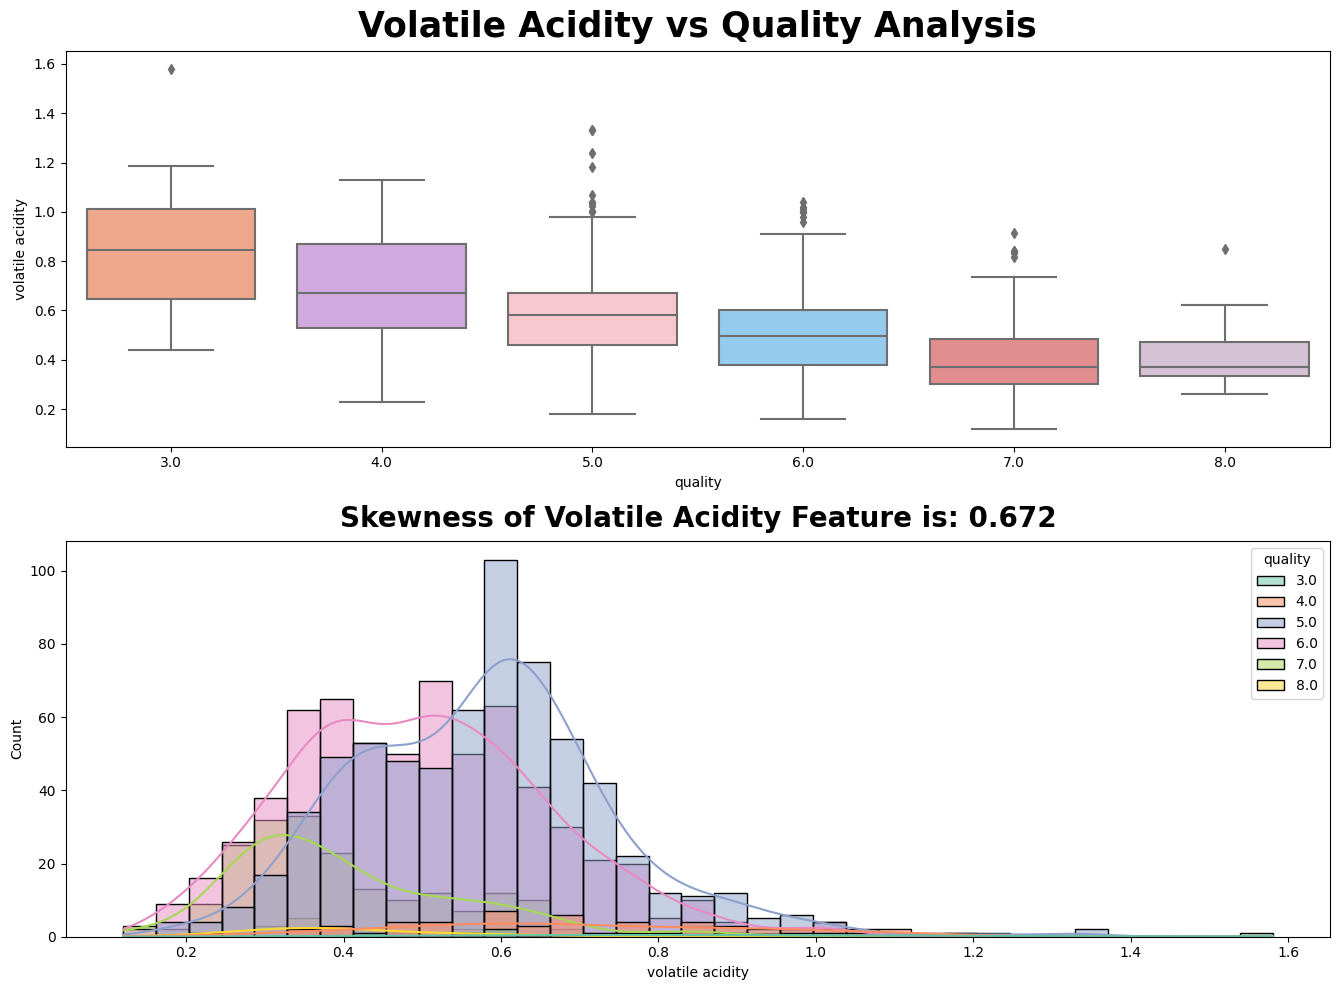

In [39]:
numerical_plot("volatile acidity")

***The feature Volatile Acidity is having almost a symmetric distribution but the distribution is right skewed with a skewness value of 0.729.***

***Skewness can lead to several implications like model performance, hypothesis testing and it returns biased estimation.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.***

# Visualizing "Citric Acid" Attribute.

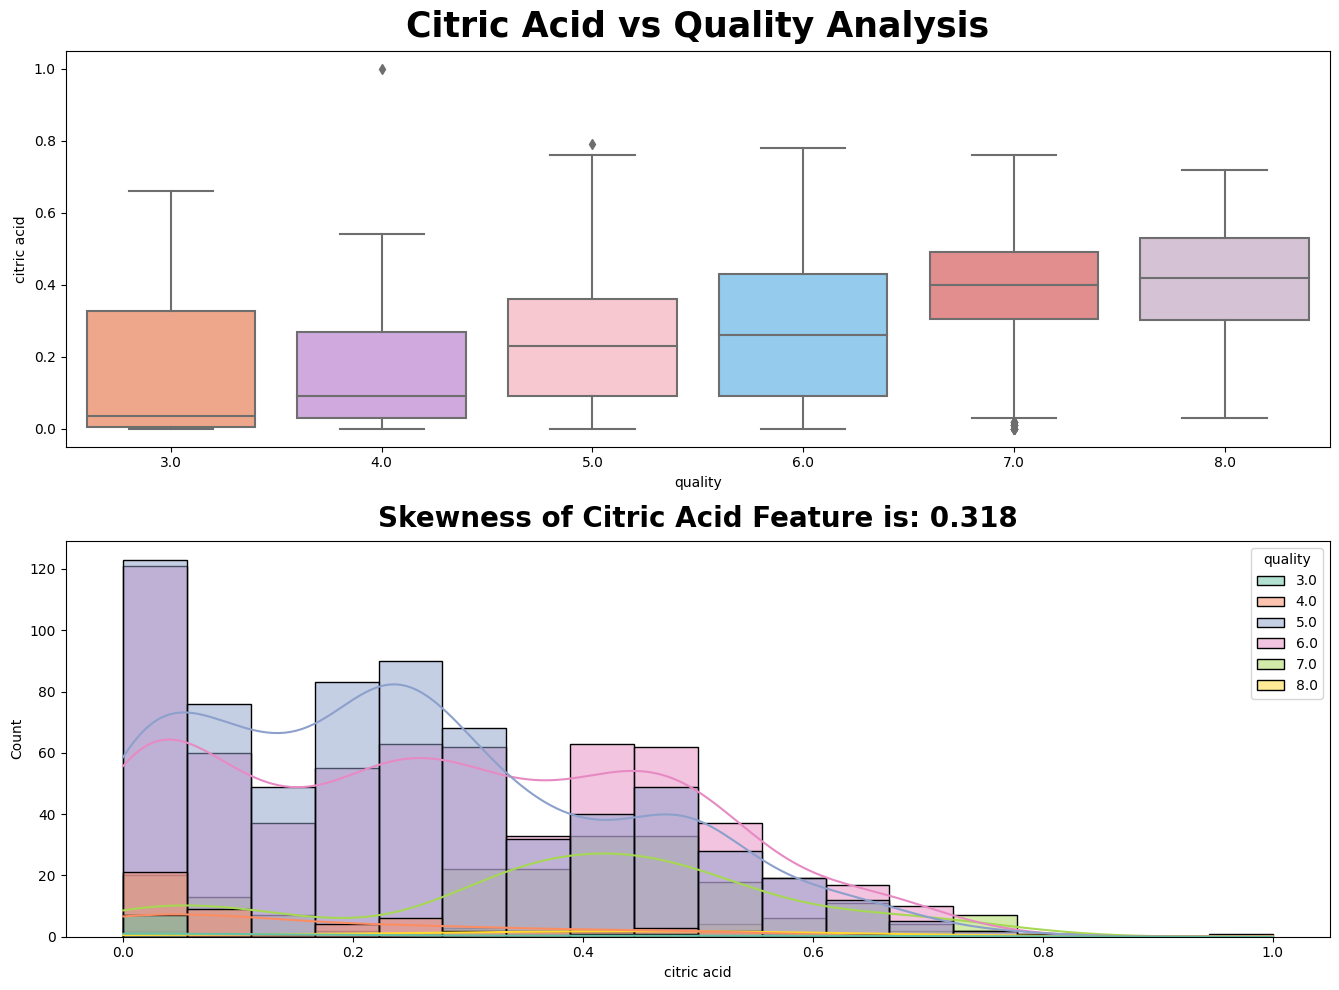

In [40]:
numerical_plot("citric acid")

***The feature Citric Acid is having a distribution of right skewed with a skewness value of 0.313.***

***Although the skewness is low but still we try to bring the skewness close to 0.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.***

#  Visualizing "Residual Sugar" Attribute.

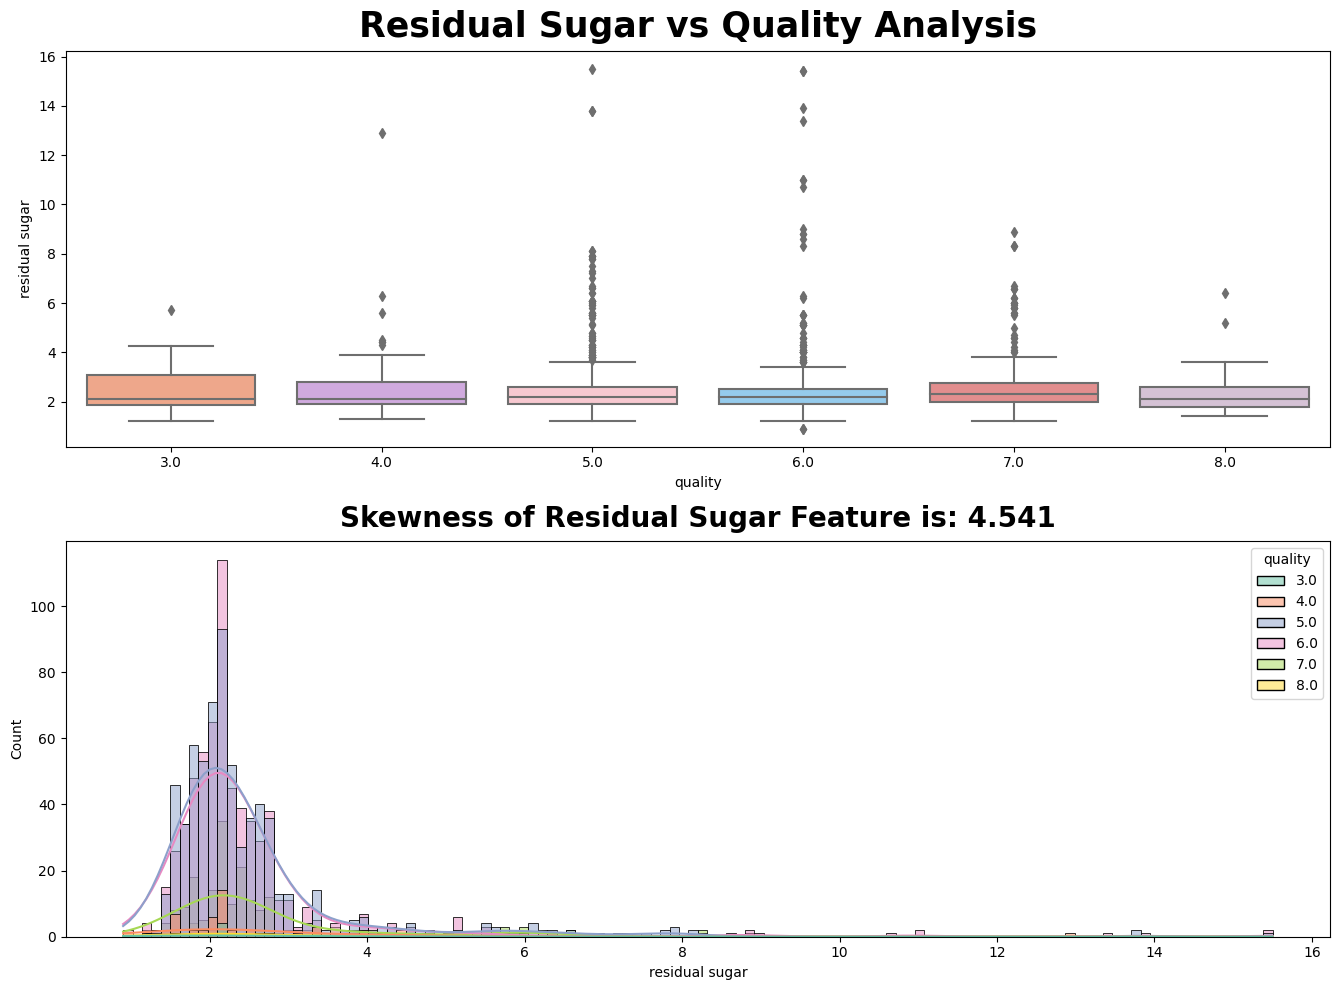

In [41]:
numerical_plot("residual sugar")

***The feature Residual Sugar is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 4.548.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

# Visualizing "Chlorides" Attribute.

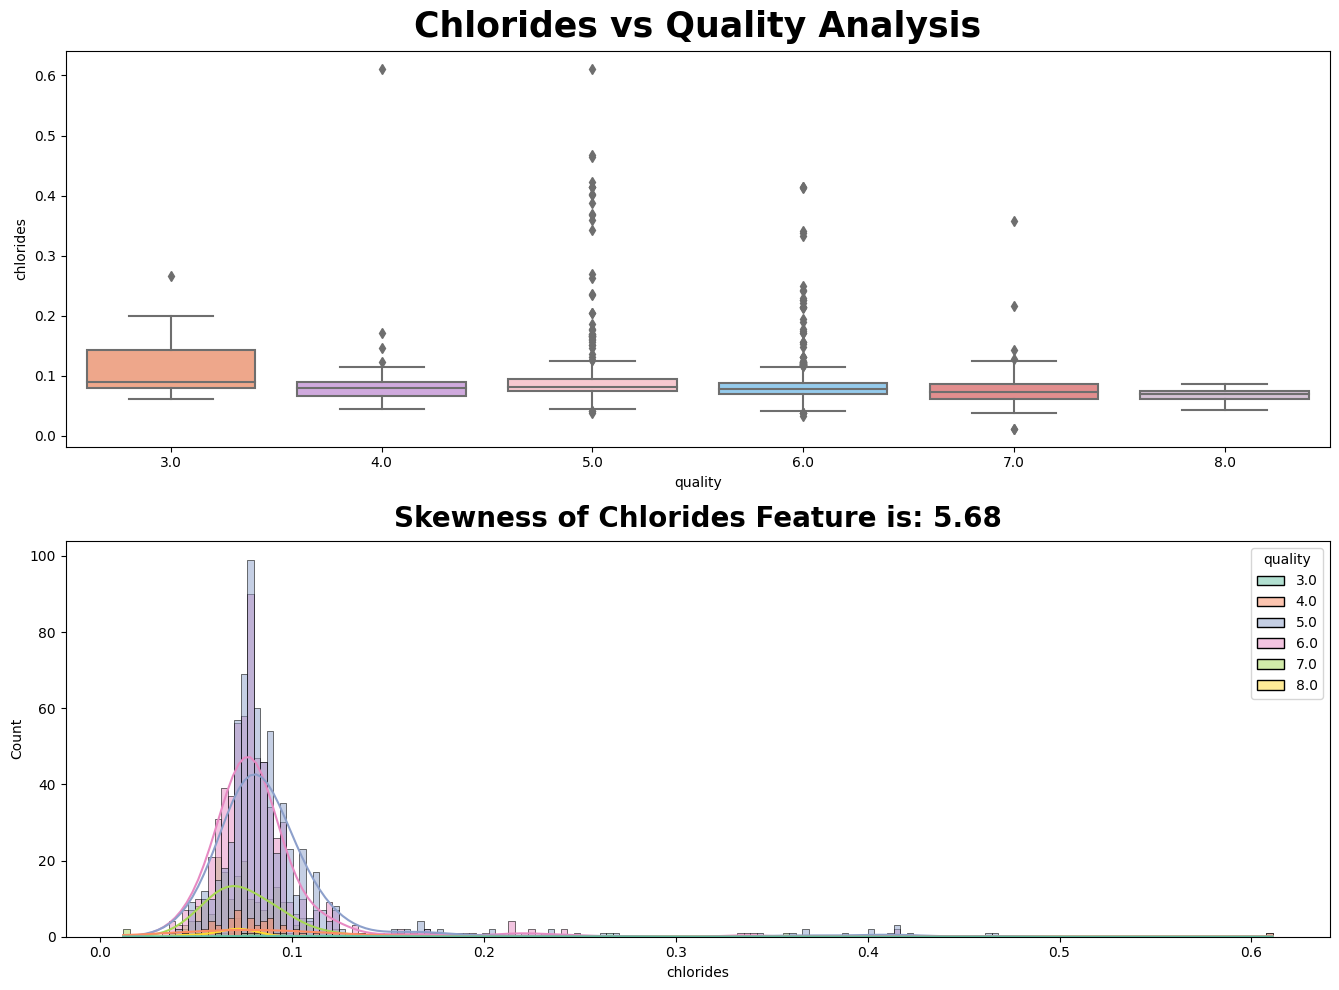

In [42]:
numerical_plot("chlorides")

***The feature Chlorides is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 5.502.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

# Visualizing "Free Sulfur Dioxide" Attribute.

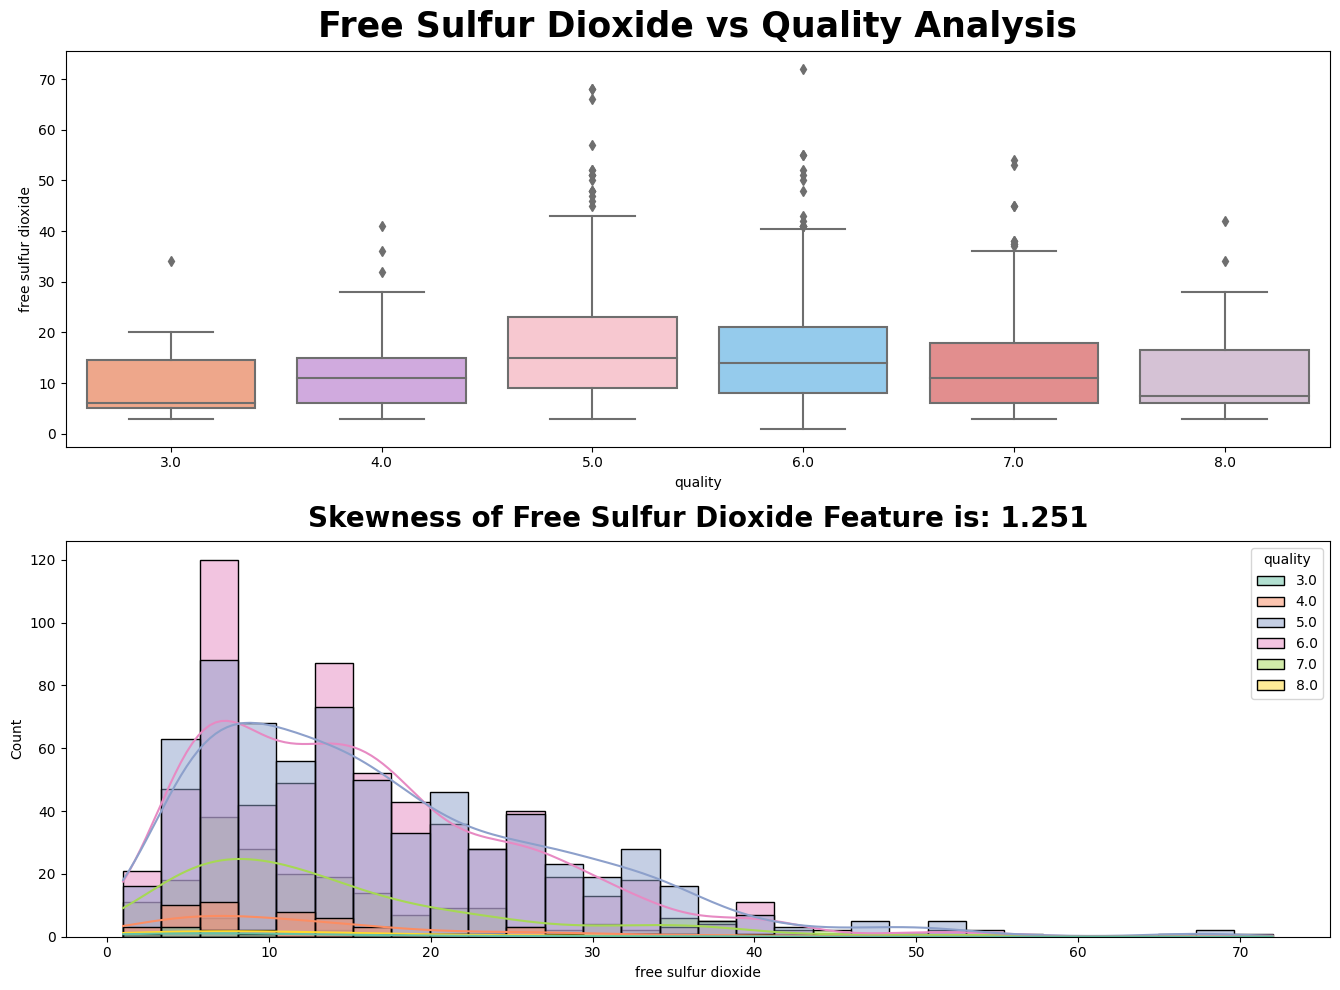

In [43]:
numerical_plot("free sulfur dioxide")

***The feature Free Sulfur Dioxide is having a highly right skewed distribution with a skewness value of 1.227.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

# Visualizing "Total Sulfur Dioxide" Attribute.

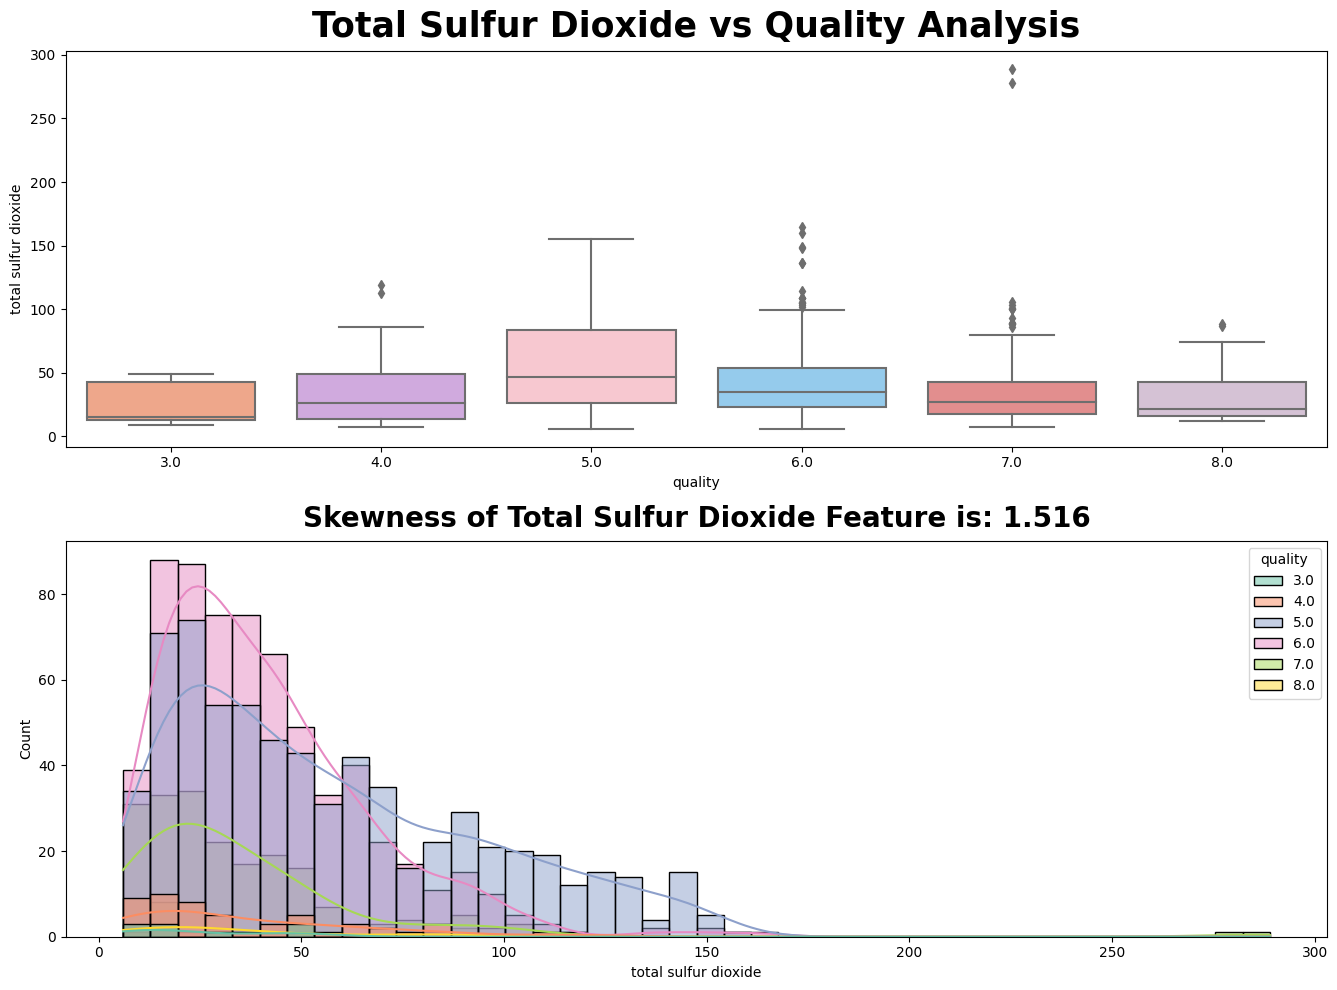

In [44]:
numerical_plot("total sulfur dioxide")

***The feature Total Sulfur Dioxide is having a highly right skewed distribution with a skewness value of 1.54.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

# Visualizing "Density" Attribute.

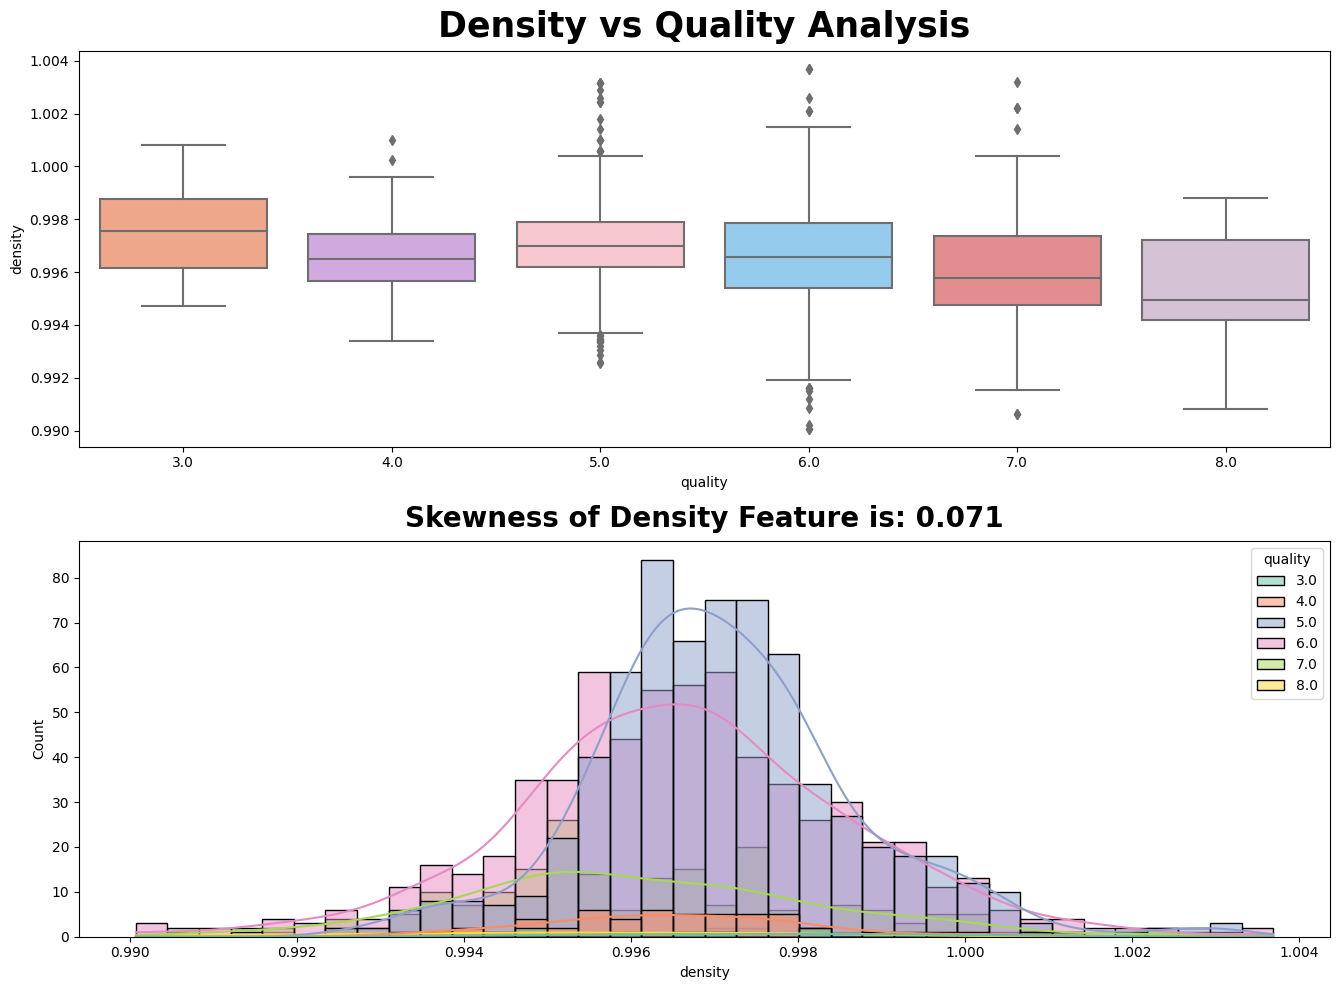

In [45]:
numerical_plot("density")

***The feature Density is having a perfect Noraml Distribution because the skewness is close to 0.***

***So we don't have to use aany transformation techniques on this feature.***

# Visualizing "pH" Attribute.

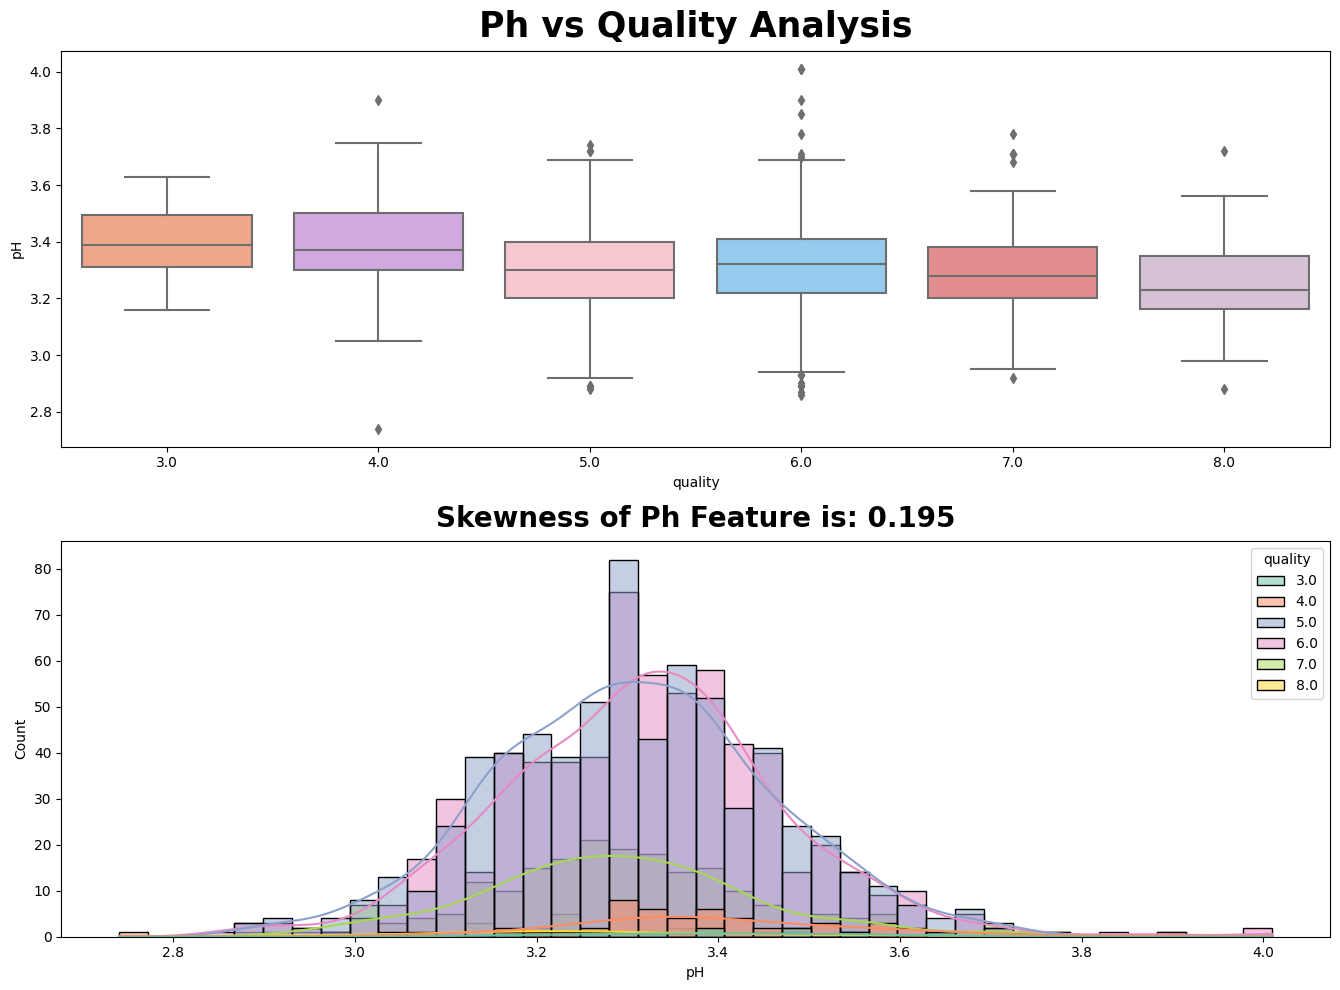

In [46]:
numerical_plot("pH")

***The feature pH is having a Normal Distribution with a skewness value of 0.232.***

***But still the tails is little right skewed because of presence of outliers.***

***So we will use transformation techniques to deal with those outliers.***

# Visualizing "Sulphates" Attribute.

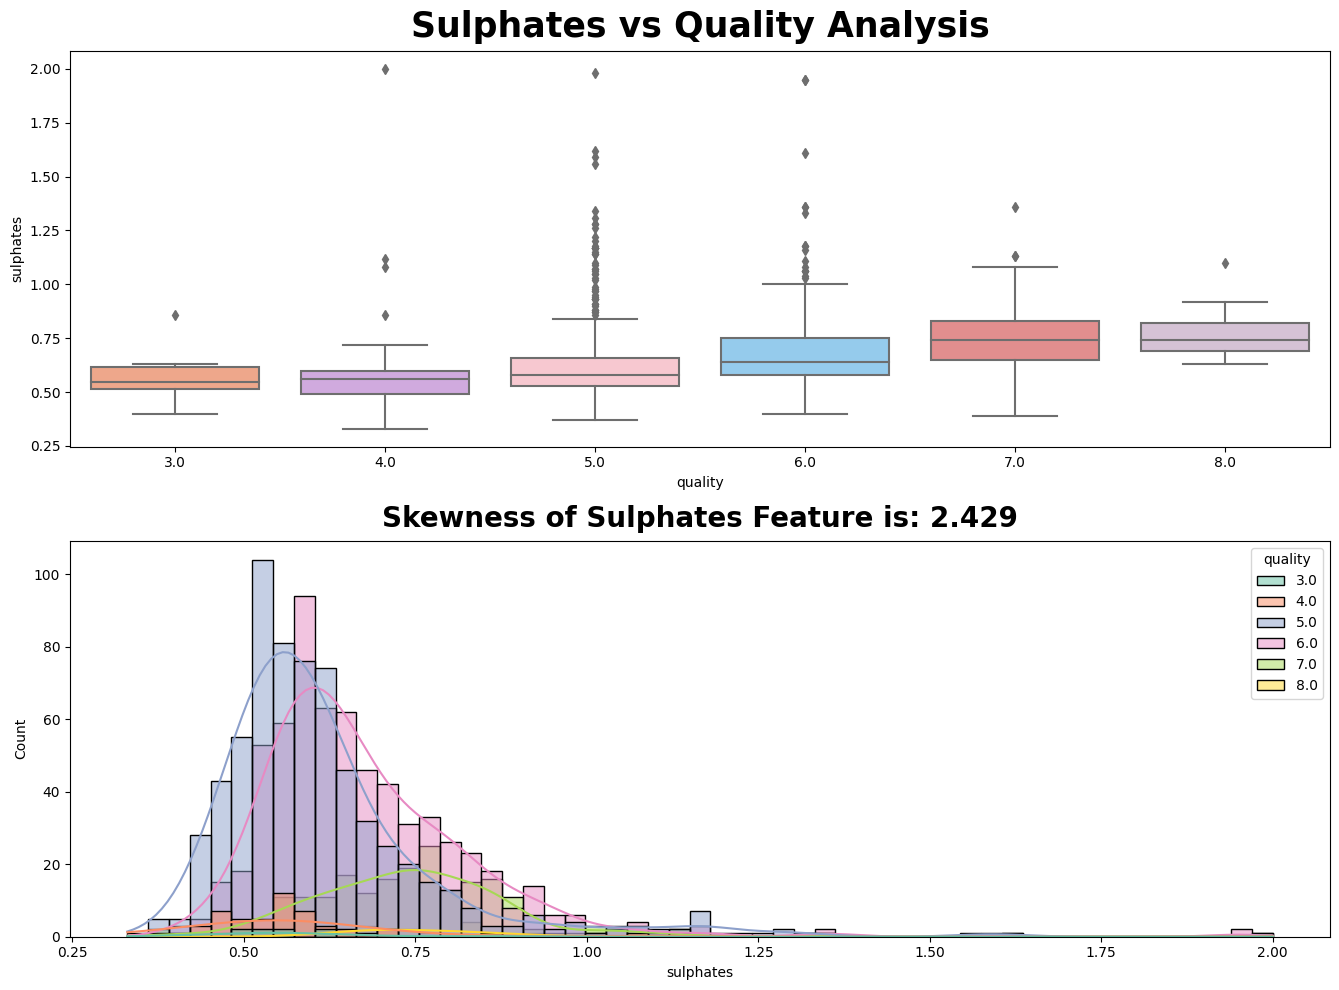

In [47]:
numerical_plot("sulphates")

***The feature Sulphates is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 2.407.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

# Visualizing "Alcohol" Attribute.

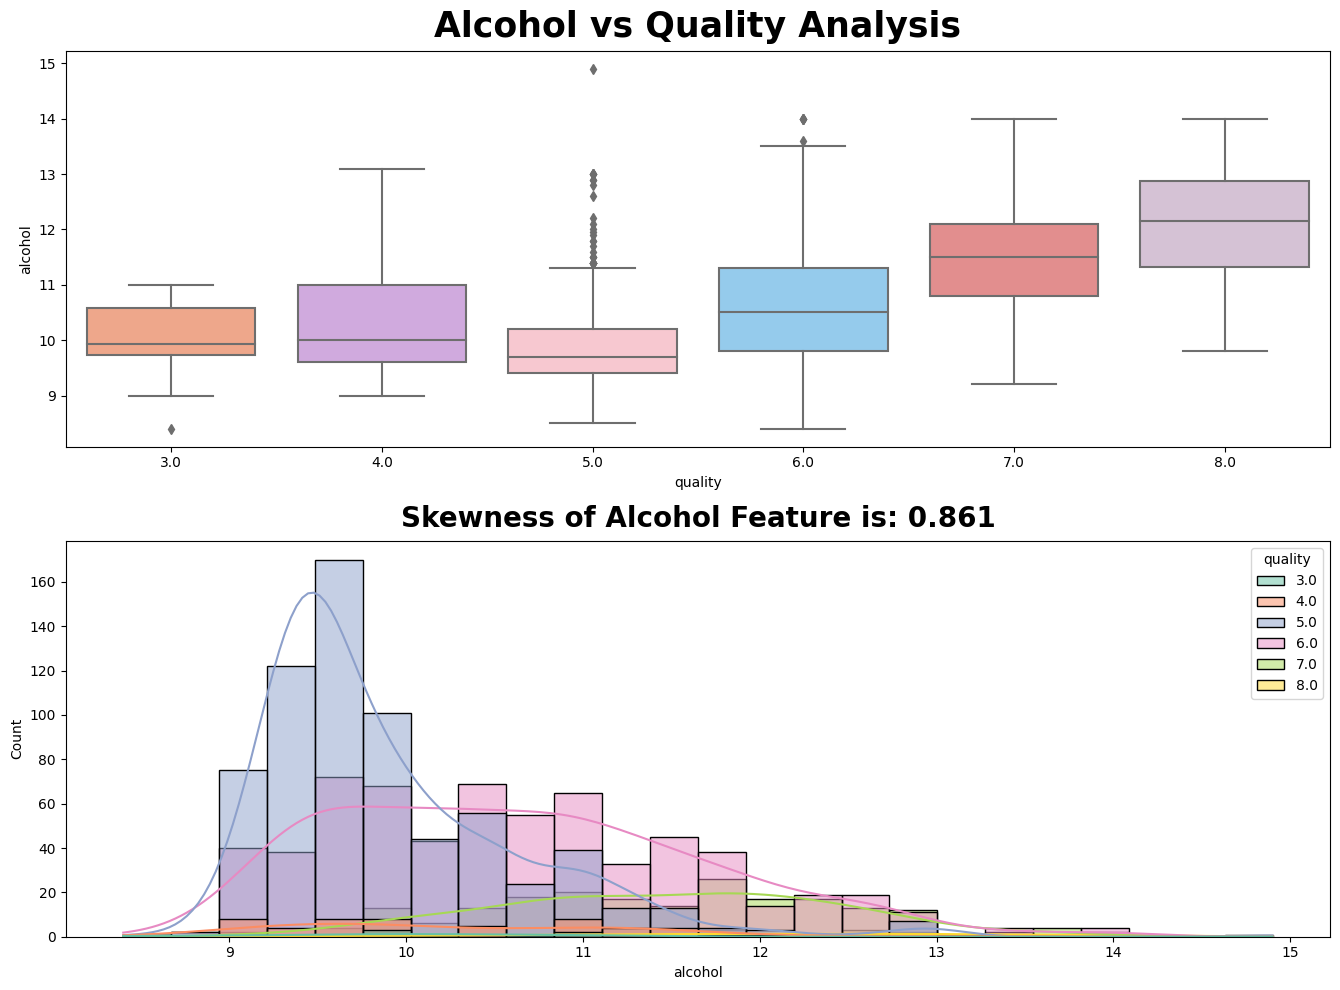

In [48]:
numerical_plot("alcohol")

***The feature Alcohol is having Asymmetric Distribution and the distribution is highly right skewed with a skewness value of 0.86.***

***The distrbution is highly right skewed because of presence of outliers.***

***So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.***

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

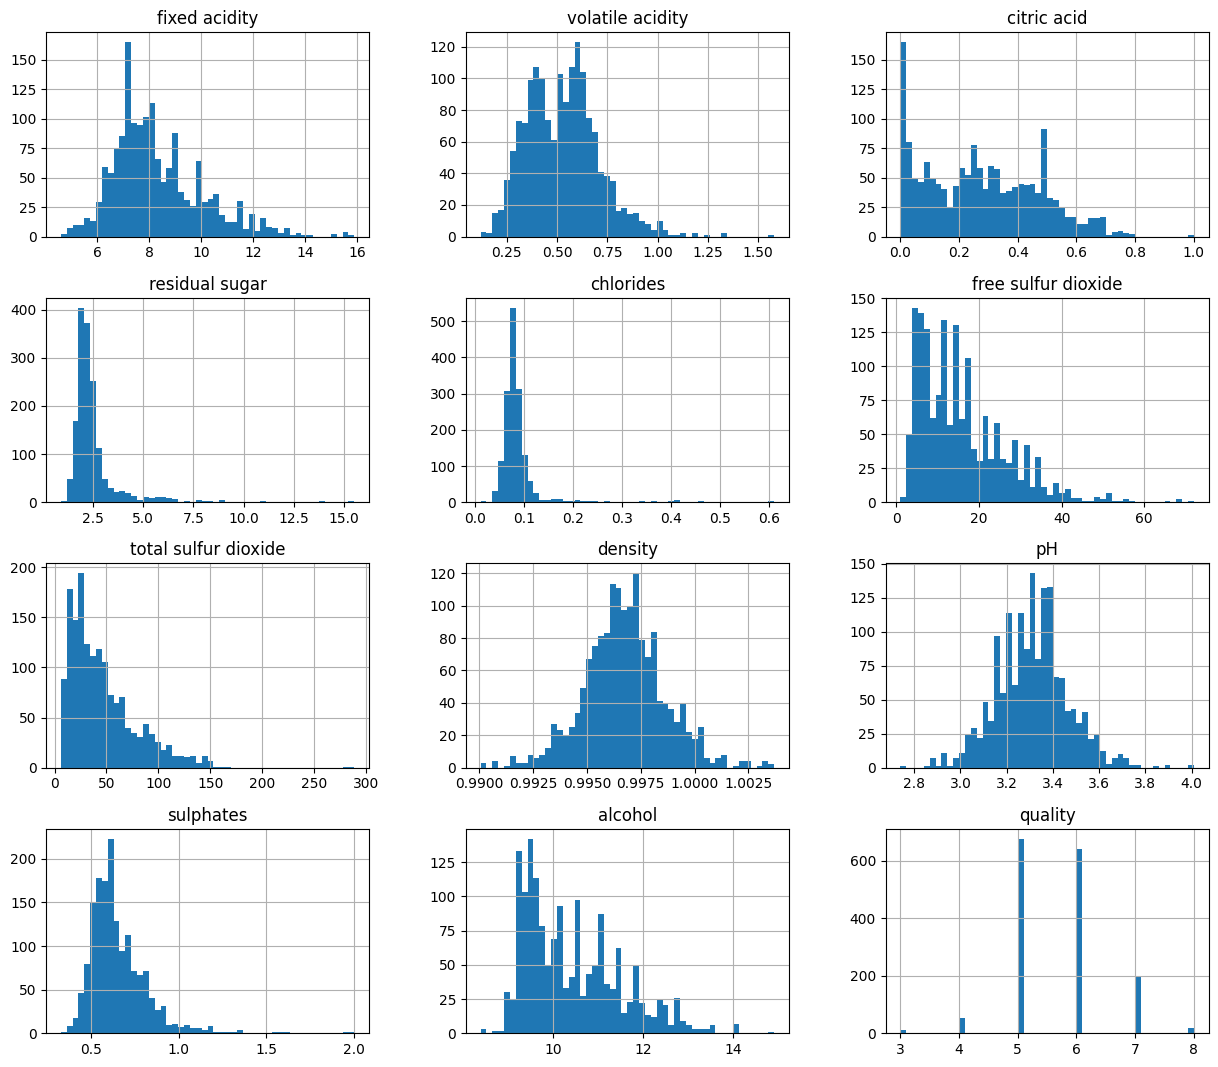

In [49]:
df.hist(figsize=(15,13),bins=50)

In [50]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# Train Test Split

In [51]:
x = df.drop(["quality"],axis=1)
y= df["quality"]

In [52]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [53]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

# Model Building

In [55]:
log = LogisticRegression()

In [56]:
log.fit(x_train,y_train)

LogisticRegression()

In [57]:
print(log.coef_)

[[-0.04405539 -3.41025584 -0.10066546  0.10546286 -1.42975174  0.0097397
  -0.01340737 -1.36610001 -2.24607739  1.94070051  0.93731717]]


In [58]:
print(log.intercept_)

[-2.16101815]


In [59]:
print("Train Score: ",log.score(x_train,y_train))

Train Score:  0.8670836591086787


In [60]:
print("Test Score: ",log.score(x_test,y_test))

Test Score:  0.909375


In [61]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [62]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1092
           1       0.59      0.30      0.40       187

    accuracy                           0.87      1279
   macro avg       0.74      0.63      0.66      1279
weighted avg       0.85      0.87      0.85      1279



In [63]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.52      0.40      0.45        30

    accuracy                           0.91       320
   macro avg       0.73      0.68      0.70       320
weighted avg       0.90      0.91      0.90       320



# AUC- ROC Curve and AUC- ROC Score

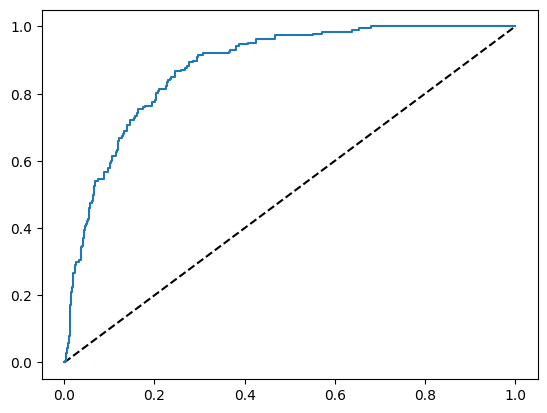

In [64]:
roc = log.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

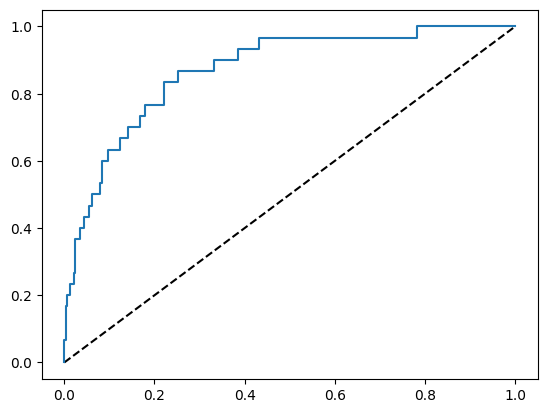

In [65]:
rocc = log.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [66]:
metrics.roc_auc_score(y_train,roc)

0.8798358504240857

In [67]:
metrics.roc_auc_score(y_test,rocc)

0.8700000000000001

# Matthew's Correlation of Coefficients

In [68]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, pred_test)
print("MCC: " , mcc)

MCC:  0.40860980599916497


# Confusion Matrix

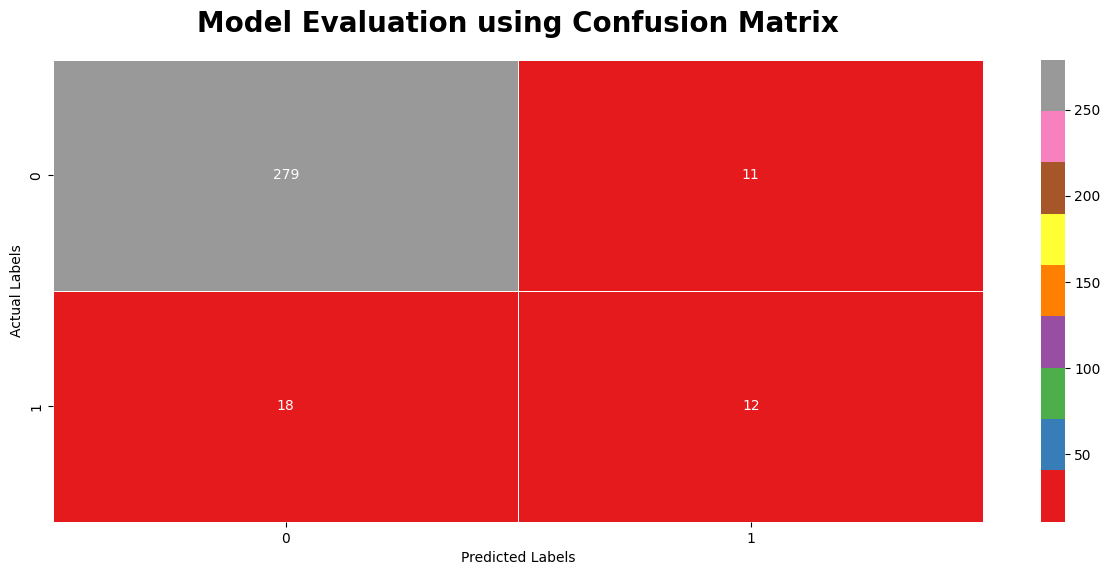

In [69]:
y_test_pred = log.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV

In [70]:
param_grid = {
    "penalty": ["l1","l2"],
    "C" : [0.1,0.5,1,5,10]
}

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid = GridSearchCV(estimator=log,param_grid=param_grid,cv=5)

In [73]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [74]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [75]:
y_pred =best_model.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [77]:
acc= accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec= recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [78]:
print("Best Param:",best_param)
print("Accuracy :" , acc)
print("precision:" ,pre)
print("Recall:", rec)
print("F1 Score:" , f1)
print("AUC-ROC:", roc_auc)

Best Param: {'C': 10, 'penalty': 'l2'}
Accuracy : 0.909375
precision: 0.5217391304347826
Recall: 0.4
F1 Score: 0.4528301886792453
AUC-ROC: 0.6810344827586207
